<a href="https://colab.research.google.com/github/RajeshMTRA/ml-projects/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import plot_tree

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
len(df)

891

# **PRE-PROCESSING**

In [ ]:
df.info()      # age, embarked, deck, embark_town

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
most_frequent = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent, inplace=True)

In [ ]:
mean_age = df['Age'].mean()
mean_fare = df['Fare'].mean()

In [ ]:
mode_age = df['Age'].mode()[0]
mode_fare = df['Fare'].mode()[0]

In [ ]:
print("Mean Age:", mean_age)
print("Mean Fare:", mean_fare)
print("Mode Age:", mode_age)
print("Mode Fare:", mode_fare)

Mean Age: 29.69911764705882
Mean Fare: 32.204207968574636
Mode Age: 29.69911764705882
Mode Fare: 8.05


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Fare'],axis='columns',inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[['Embarked']] = encoder.fit_transform(df[['Embarked']])

In [ ]:
sex = df['Sex']
df = df.drop('Sex', axis = 'columns')

In [ ]:
sex = sex.replace(['male', 'female'], [1,0])

In [ ]:
df['Sex'] = sex

In [ ]:
value_counts=df.groupby('Survived').size().reset_index(name='count')
print(value_counts)

   Survived  count
0         0    549
1         1    342


# **VISUALIZATION**

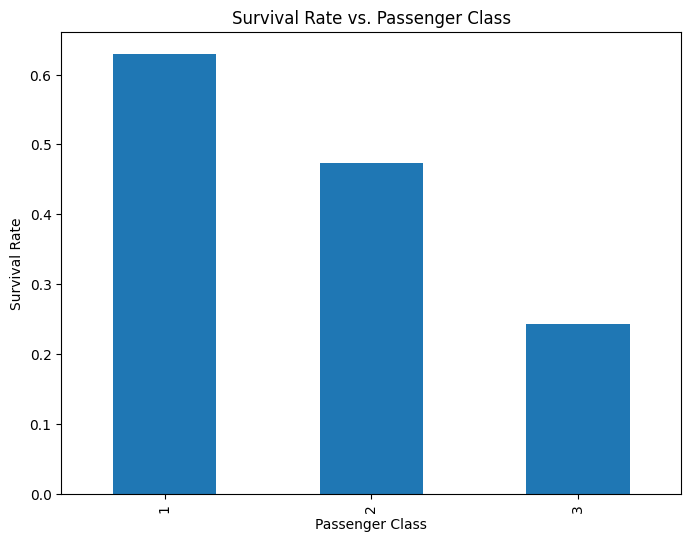

In [ ]:
survive_vs_class = df.groupby('Pclass')['Survived'].mean()

# Plot survival rate vs. passenger class
plt.figure(figsize=(8, 6))
survive_vs_class.plot(kind='bar')
plt.title('Survival Rate vs. Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

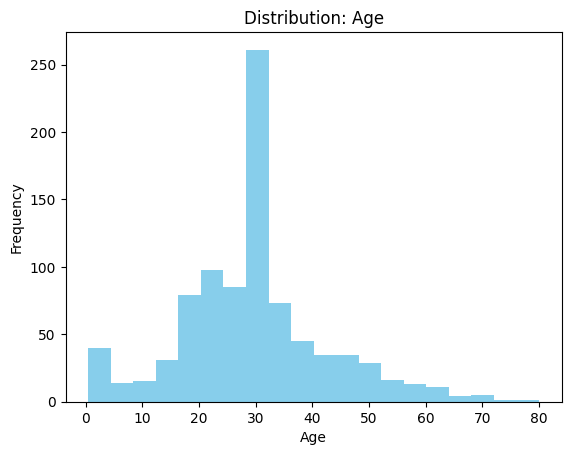

In [ ]:
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title('Distribution: Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Compare survival rate between Genders
survival_rates = df.groupby('Sex')['Survived'].mean()
print(survival_rates)

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64


In [ ]:
target = df.Survived
df = df.drop('Survived', axis = 'columns')

In [ ]:
df.head()

,Pclass,Age,Embarked,Sex
0,3,22.0,2.0,1
1,1,38.0,0.0,0
2,3,26.0,2.0,0
3,1,35.0,2.0,0
4,3,35.0,2.0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[ 0.82737724, -0.5924806 ,  0.58595414,  0.73769513],
       [-1.56610693,  0.63878901, -1.9423032 , -1.35557354],
       [ 0.82737724, -0.2846632 ,  0.58595414, -1.35557354],
       ...,
       [ 0.82737724,  0.        ,  0.58595414, -1.35557354],
       [-1.56610693, -0.2846632 , -1.9423032 ,  0.73769513],
       [ 0.82737724,  0.17706291, -0.67817453,  0.73769513]])

# **TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 42)

In [ ]:
print("train data size(features): ", len(X_train))
print("train data size(target): ", len(y_train))

print("test data size(features): ", len(X_test))
print("test data size(target): ", len(y_test))

train data size(features):  712
train data size(target):  712
test data size(features):  179
test data size(target):  179


# **SVC (using GridSearchCV)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(SVC(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
SVC_model = SVC(C=10, kernel='rbf', degree=2, gamma=0.1, coef0=0.0, tol=0.0001, decision_function_shape='ovr')

In [ ]:
SVC_model.fit(X_train, y_train)

SVC(C=10, degree=2, gamma=0.1, tol=0.0001)

In [ ]:
unseen_pred = SVC_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("accuracy: ", accuracy_score(unseen_pred, y_test))

accuracy:  0.8044692737430168


# **Random Forest (Using GridSearchCV)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt = RandomForestClassifier()

params = {'n_estimators': [50,100, 200], 'max_depth': [10, 20,30]}

gsearch = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, scoring='accuracy')
gsearch.fit(X_train,y_train)
gsearch.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 50, max_depth = 30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=50)

In [ ]:
unseen_pred=rf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, unseen_pred)
print(f"Test set accuracy: {accuracy}")

Test set accuracy: 0.7821229050279329


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_score_

0.8215995272333302

In [ ]:
knn_clf =KNeighborsClassifier(n_neighbors = 20, p=1, weights='uniform')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, p=1)

In [ ]:
y_pred_knn = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_knn)
print(f'Accuracy of KNN: {accuracy}')

Accuracy of KNN: 0.7932960893854749


# Logistic **regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=100000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
log_reg = LogisticRegression(penalty='l2',C=0.01)

In [ ]:
log_reg.fit(X_train ,y_train)

LogisticRegression(C=0.01)

In [ ]:
unseen_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, unseen_pred)
print("Accuracy on unseen data:", accuracy)

Accuracy on unseen data: 0.8044692737430168
